In [1]:
# Autoreload
%load_ext autoreload

In [2]:
import os 
# Traverse the current working directory backwards to find the  directory with name "workspace"
workspace_dir = os.getcwd()
while os.path.basename(workspace_dir) != 'ai4ar-helper':
    workspace_dir = os.path.dirname(workspace_dir)

data_dir = os.path.join(workspace_dir,'..','ai4ar-radiomics', 'data', 'trial')

In [3]:
# Add src to the path
import sys
sys.path.append(os.path.join(workspace_dir, 'src'))


In [4]:
data_dir

'd:\\workspace\\ai4ar-helper\\..\\ai4ar-radiomics\\data\\trial'

In [5]:
from ai4ar import Dataset, Case, select_slice

In [6]:
dataset = Dataset(data_dir)

In [7]:
dataset.case_ids

['001', '003', '004', '005']

In [8]:
case = dataset['001']


In [9]:
case.summarize()

Image: anatomical_labels/afs
Image: anatomical_labels/cz
Image: anatomical_labels/pg
Image: anatomical_labels/pz
Image: anatomical_labels/sv_l
Image: anatomical_labels/sv_r
Image: anatomical_labels/tz
Image: data/adc
Image: data/cor
Image: data/dce1
Image: data/dce2
Image: data/dce3
Image: data/dce4
Image: data/dce5
Image: data/dce6
Image: data/hbv
Image: data/sag
Image: data/t2w
Image: lesion_labels/lesion1/adc/8ZmM76
Image: lesion_labels/lesion1/adc/OjmNZ8
Image: lesion_labels/lesion1/adc/OrjnrO
Image: lesion_labels/lesion1/dce3/OrjnrO
Image: lesion_labels/lesion1/hbv/8ZmM76
Image: lesion_labels/lesion1/hbv/OjmNZ8
Image: lesion_labels/lesion1/hbv/OrjnrO
Image: lesion_labels/lesion1/t2w/8ZmM76
Image: lesion_labels/lesion1/t2w/OjmNZ8
Image: lesion_labels/lesion1/t2w/OrjnrO


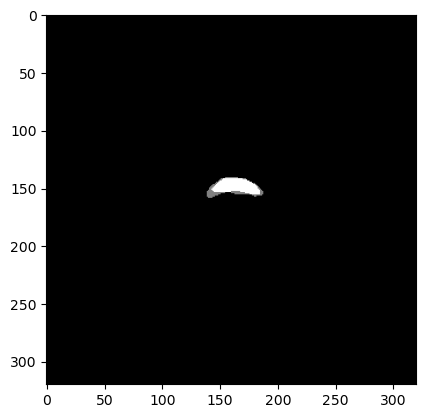

In [11]:
import matplotlib.pyplot as plt

combined_t2w_mask = case.image('lesion_labels/lesion1/t2w', combine=True)

# Visualize the combined mask
plt.imshow(combined_t2w_mask[select_slice(combined_t2w_mask)], cmap='gray')

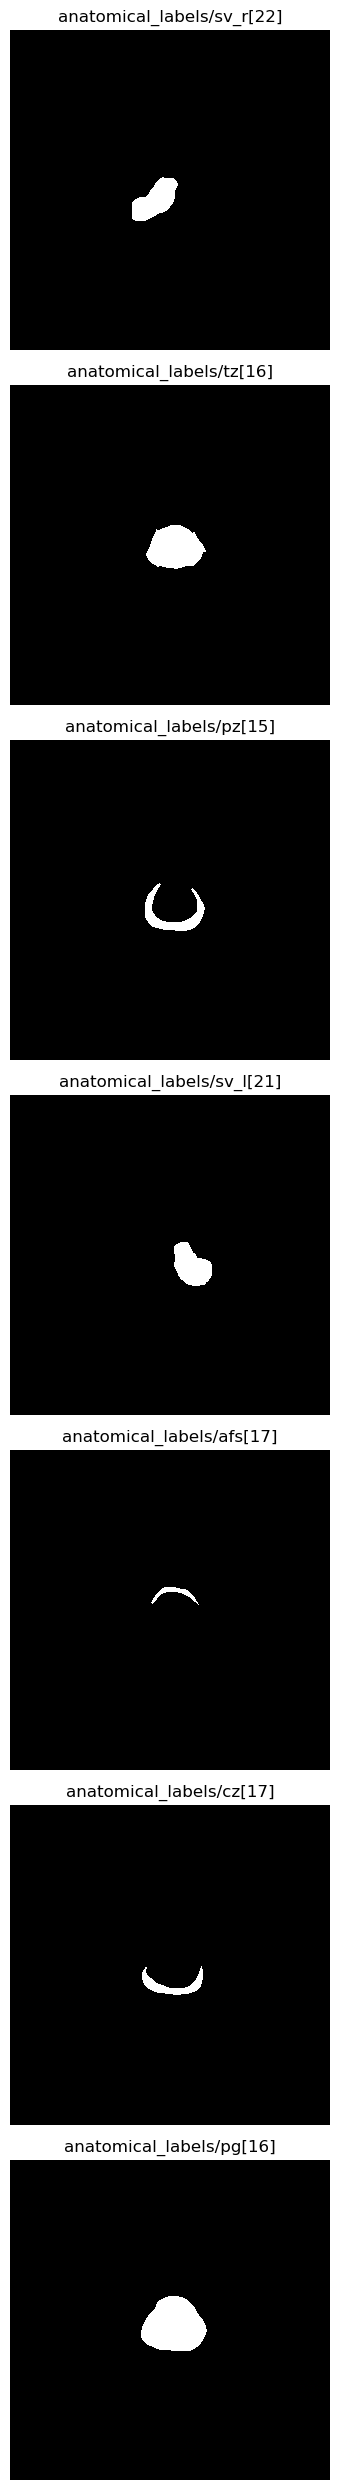

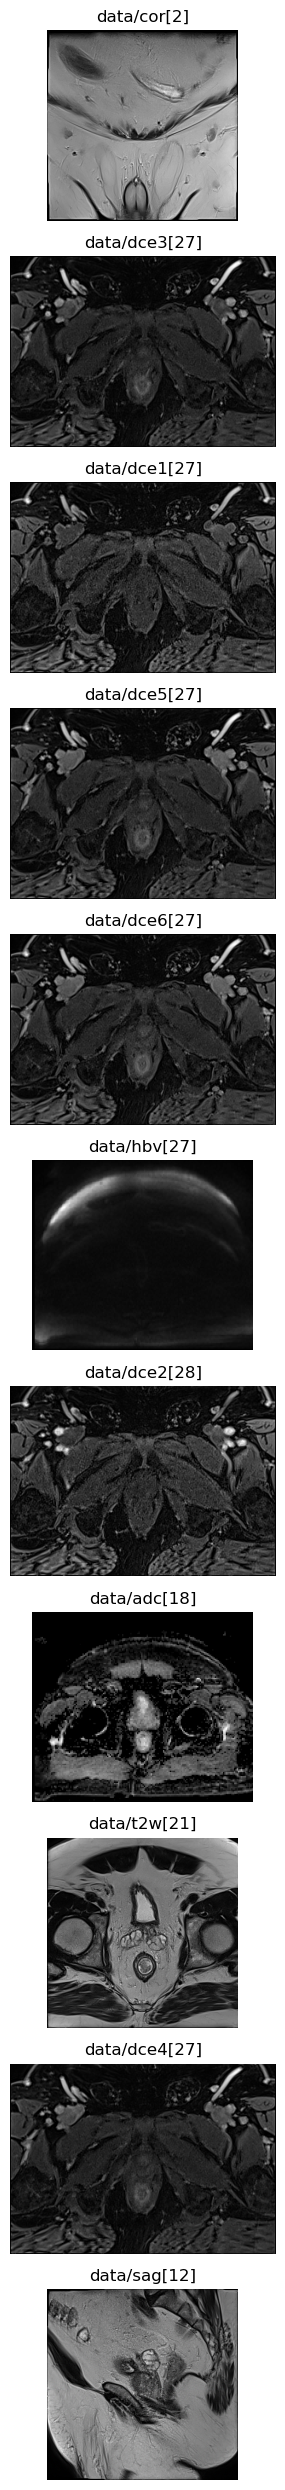

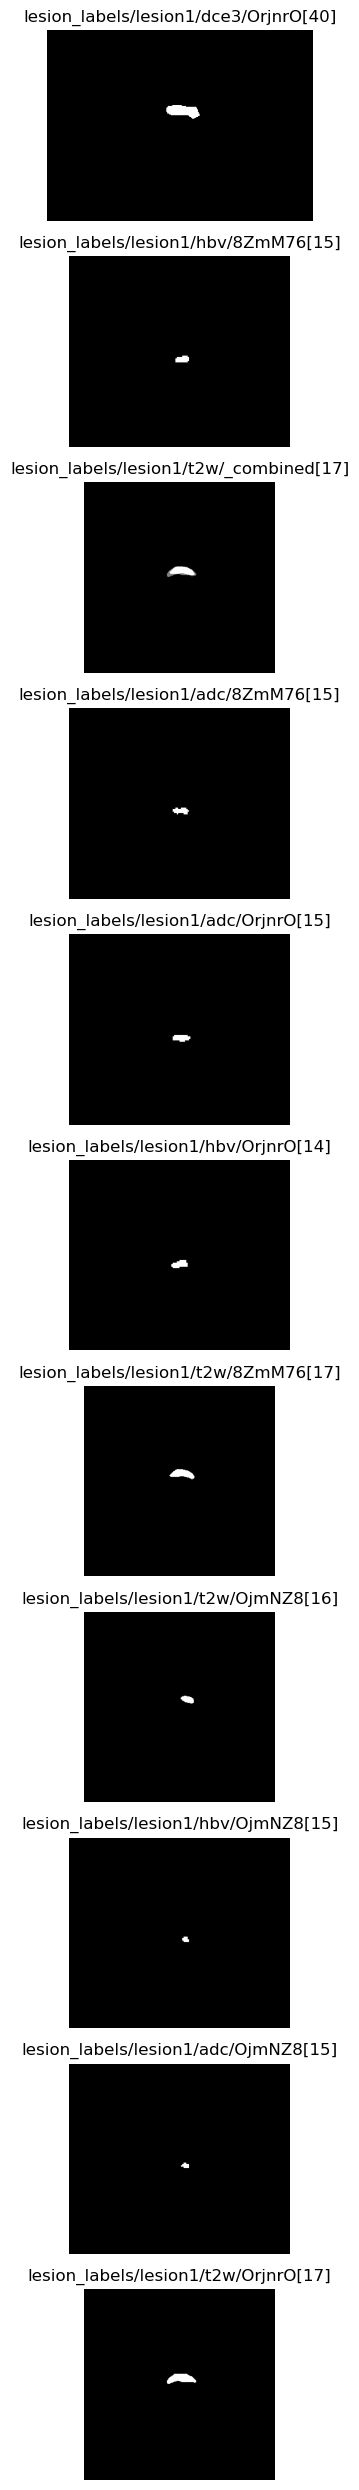

In [12]:
dataset['001'].visualize()